<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/apriori_association_rules_grocery_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1 style="background-color:seagreen; color:white" >Regla de Asociación Apriori</h1> 



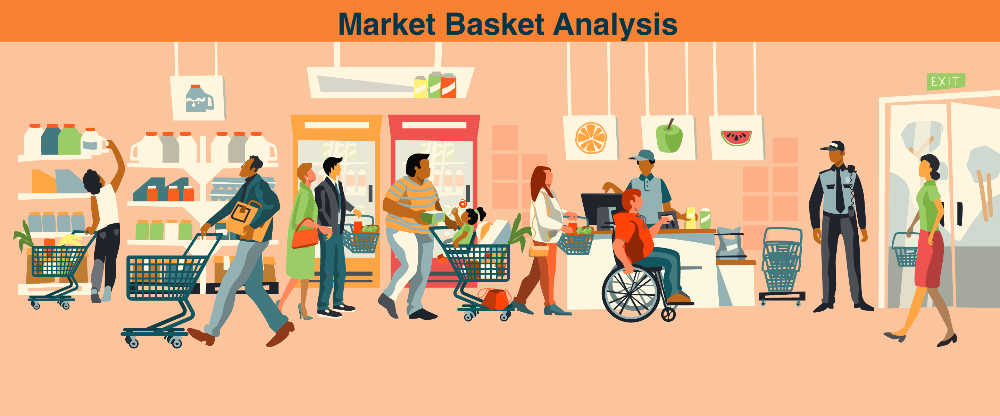

In [ ]:
#@title
from IPython.display import Image
Image("/content/drive/MyDrive/Market basket analysis/imagen/marke_basket.png", width=900)

## **¿Reglas de asociación? Qué es eso!**

El aprendizaje de reglas de asociación es un método de aprendizaje automático basado en reglas para descubrir relaciones interesantes entre variables en grandes bases de datos. Su objetivo es identificar reglas sólidas descubiertas en bases de datos utilizando algunas medidas de interés.

Basándose en el concepto de reglas estrictas, **Rakesh Agrawal, Tomasz Imieliński y Arun Swam** introdujeron reglas de asociación para descubrir regularidades entre productos en datos de transacciones a gran escala registrados por sistemas de punto de venta (POS) en los supermercados. Por ejemplo, la regla **{cebollas, patatas} -> {hamburguesa}** que se encuentra en los datos de ventas de un supermercado indicaría que si un cliente compra cebollas y patatas juntas, es probable que también compre carne de hamburguesa. Dicha información se puede utilizar como base para decisiones sobre actividades de marketing como, por ejemplo, precios promocionales o colocación de productos.

Además del ejemplo anterior del análisis de la canasta de mercado, las reglas de asociación se emplean hoy en muchas áreas de aplicación, incluida la minería del uso de la web, la detección de intrusiones, la producción continua y la bioinformática. A diferencia de la minería de secuencias, el aprendizaje de reglas de asociación generalmente no considera el orden de los elementos dentro de una transacción o entre transacciones. [Wikipedia]


**Reglas de asociación**

Si bien estamos interesados en extraer conjuntos frecuentes de elementos, esta información a menudo se presenta como una colección de reglas **si-entonces**, llamadas **reglas de asociación**.

La forma de una regla de asociación es $\{X\rightarrow Y\}$, donde $\{X\}$ es un conjunto de elementos y $\{Y\}$ es un elemento. La implicación de esta regla de asociación es que si todos los elementos de $\{X\}$ aparecen en alguna canasta, entonces $\{Y\}$ es “probable” que también aparezcan en esa canasta.

*	$\{X\}$ también se llama antecedente o lado izquierdo (LHS) y

* $\{Y\}$ se llama consecuente o lado derecho (RHS) .

Un ejemplo de regla de asociación para productos de Apple podría ser $\{Apple iPad, Apple,iPad, Cover\}\rightarrow \{Apple, Pencil\}$, lo que significa que si $\{X\}$ se compran la funda para iPad y iPad de Apple , es probable que los clientes también compren el lápiz de Apple $\{Y\}$. Observe que el símbolo de implicación lógica 
$\rightarrow$ no indica una relación causal entre $\{X\}$ e $\{Y\}$. Es simplemente una estimación de la probabilidad condicional de $\{Y\}$ dado $\{X\}$.

Ahora imagine una tienda de comestibles con decenas de miles de productos diferentes. No querríamos calcular todas las asociaciones entre todas las combinaciones posibles de productos. En su lugar, querríamos seleccionar solo reglas potencialmente "relevantes" del conjunto de todas las reglas posibles. Por eso, utilizamos las medidas de 

* **Soport (Soporte,apoyo)**

* **Confidence (Confianza)**

* **Lift (Levantamiento)**

para reducir el número de relaciones que necesitamos analizar:
 
* **El soporte:** es una indicación de la frecuencia con la que aparece un conjunto de artículos en las cestas.

*	**La confianza:** es una indicación de la frecuencia con la que se ha encontrado que la regla de apoyo es cierta.

*	**El levantamiento:** es una medida de asociación que utiliza tanto apoyo como confianza.

Si buscamos reglas de asociación $\{X\rightarrow Y\}$ que se apliquen a una fracción razonable de las canastas, entonces el soporte de X debe ser razonablemente alto. En la práctica, como en el caso de la comercialización en tiendas físicas, "razonablemente alto" suele ser entre el 1% y el 10% de las canastas. También queremos que la confianza de la regla sea razonablemente alta, quizás el 50%, o de lo contrario la regla tiene poco efecto práctico. (Leskovec, Rajaraman y Ullman, 2020)

Además, se debe suponer que no hay demasiados conjuntos de elementos frecuentes y, por lo tanto, no hay demasiados candidatos para las reglas de asociación de alto apoyo y alta confianza. La razón de esto es que si les damos a las empresas muchas reglas de asociación que cumplen con nuestros umbrales de apoyo y confianza, ni siquiera pueden leerlas, y mucho menos actuar en consecuencia. Por lo tanto, es normal ajustar los umbrales de soporte y confianza para que no obtengamos demasiados conjuntos de elementos frecuentes. (Leskovec, Rajaraman y Ullman, 2020).

**2 Medidas de asociación**

#### **2.1 Soporte**

El soporte métrico nos dice qué tan popular es un conjunto de elementos, medido por la proporción de transacciones en las que aparece el conjunto de elementos.

Según nuestros datos, los soporte son de.
El soporte **{manzana}** es 4 de 8, o 50%. 
El soporte de **{manzana, cerveza, arroz}** es 2 de 8, o 25%.
El soporte **{leche, cerveza}** es 3 de 8, o 37.5%.

$$support(manzana)=\frac{4}{8} $$

O en general, para un conjunto de elementos $X$:

$$support(X)=\frac{Frecuencia(X)}{n} $$

con n = número de todas las transacciones (cestas).

Por lo general, se utiliza un umbral de soporte específico para reducir la cantidad de conjuntos de elementos que necesitamos analizar. Al comienzo del análisis, podríamos establecer nuestro umbral de soporte al 10%.

**2.2 Confianza**

La confianza nos dice la probabilidad de que se compre un artículo $Y$ dado que se compra el artículo $X$, expresado como $\{X\rightarrow Y\}$. Se mide por la proporción de transacciones con el artículo $X$, en el que también aparece el artículo $Y$. La confianza de una regla se define como:

$$\ support(X\rightarrow Y)=\frac{support(X\cup Y)}{support(X)} $$

Por tanto, la confianza se puede interpretar como una estimación de la probabilidad $P(Y/X)$. En otras palabras, esta es la probabilidad de encontrar el RHS (Y) de la regla en transacciones con la condición de que estas transacciones también contengan el LHS (X) (Hornik, Grün y Hahsler, 2005). La confianza está dirigida y por lo tanto suele dar valores diferentes a las reglas $X\rightarrow Y$ y $Y\rightarrow X$.

Tenga en cuenta que $support(X\cup Y)$ significa el apoyo de la unión de los elementos en $X$ e $Y$. Dado que generalmente declaramos probabilidades de eventos y no conjuntos de elementos, podemos reescribir $support(X\cup Y)$ como la probabilidad $P(E_X\cap E_Y )$, dónde $E_X$ y $E_Y$, son los eventos en los que una transacción contiene el conjunto de elementos $X$ e $Y$, respectivamente.

En nuestro ejemplo, la confianza en que se compra cerveza dado que se compra manzana $(\{manzana\rightarrow cerveza\})$   es 3 de 4, o 75%.  Esto significa que la  probabilidad condicional $P(cerveza | manzana) = 75%$. manazan es el antecedente o el lado izquierdo (LHS) y la cerveza es el consecuente o el lado derecho (RHS).

$$confidene(apple->beer)=\frac{support(apple\cup beer)}{support(apple)} $$

$$=\frac{(2/8)}{(4/8)} =0.5$$

Tenga en cuenta que la medida de confianza podría tergiversar la importancia de una asociación. Esto se debe a que solo tiene en cuenta lo popular que es el artículo $X$ (en nuestro caso, la manzana) pero no $Y$ (en nuestro caso, la cerveza).

Si la cerveza también es muy popular en general, habrá una mayor probabilidad de que una transacción que contenga manzana también contenga cerveza, lo que inflará la medida de confianza. Para tener en cuenta la popularidad base de ambos elementos, utilizamos una tercera medida denominada incremento.

**Elevación o lift**

**Lift** nos dice qué tan probable es que se compre el artículo $Y$ cuando se compra el artículo $X$, mientras controla qué tan populares son los artículos $Y$ y $X$. Mide cuántas veces más $X$ e $Y$ ocurren juntos de lo esperado si fueran estadísticamente independientes.

En nuestro ejemplo, la elevación se calcula como:

$$Lift(manzana→cerveza)=\frac {support(manzana\cup  cerveza)} {(support(manzana)support(cerveza)} $$

$$=\frac{(2/8)}{(4/8)(5/8)}=0.8$$

Un valor de elevación de:

*	**elevación = 1:** implica que no hay asociación entre elementos.

*	**elevación> 1:** mayor que 1 significa que es probable que se compre el artículo $Y$ si se compra el artículo $X$, es decir,  $P(Y/X)$

*	**elevación <1:** menos de 1 significa que es poco probable que se compre el artículo $Y$ si se compra el artículo $X$.

La elevación de $\{manzana\rightarrow cerveza\}$ es 0.8, lo que implica que es poco probable que se compre el artículo $Y$ si se compra el artículo $X$

- **Conviction:** La razón de la frecuencia esperada en la que $X$ ocurre sin $Y $(es decir, la frecuencia con la que la regla hace una predicción incorrecta) si $X$ e $Y$ fueran independientes dividida por la frecuencia observada de predicciones incorrectas.

Conviction compara la probabilidad de que $X$ aparezca sin $Y$ si fueran dependientes con la frecuencia real de aparición de $X$ sin $Y4$. En ese sentido, es similar a lift (ver sección sobre lift), sin embargo, contrasta levantarlo. es una medida dirigida. Además, la convicción es monótona en la confianza y la elevación.

- **Leverage:** Conviction compara la probabilidad de que $X$ aparece sin $Y$ si fueron dependientes con la frecuencia real de aparición de $X$ sin $Y$. En sentido, es similar a lift (ver sección sobre lift en esta página), sin embargo, contrasta levantarlo. es una medida dirigida. Además, la convicción es monótona en la confianza y la elevación.

Lo racional en un entorno de ventas es averiguar cuántas unidades más (artículos $X$ e $Y$ juntos) se venden de lo esperado de las ventas independientes. Usando min. los umbrales de apalancamiento incorporan al mismo tiempo una restricción de frecuencia implícita. Por ejemplo, para establecer un min. umbrales de apalancamiento al 0,01% (corresponde a 10 casos en un conjunto de datos con 100.000 transacciones), primero se puede utilizar un algoritmo para encontrar todos los conjuntos de elementos con mín. soporte de 0.01% y luego filtrar los conjuntos de elementos encontrados usando la restricción de apalancamiento. Debido a esta propiedad, el apalancamiento también puede sufrir el problema de los artículos raros. [Michael Hahsler]

<a id='libraries'></a>
<h1 style="color:forestgreen" >1. Packages</h1> 

In [ ]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# INSTALL
# !pip install mlxtend

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION 
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS 
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:forestgreen" >2. Data</h1> 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Market basket analysis/data/GroceryStoreDataSet.csv",names=['products'],header=None)
df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [ ]:
df.shape

(20, 1)

<a id='tidydata'></a>
<h1 style="color:forestgreen" >3. Datos ordenados para las reglas de la asociación</h1> 

In [ ]:
data = list(df["products"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


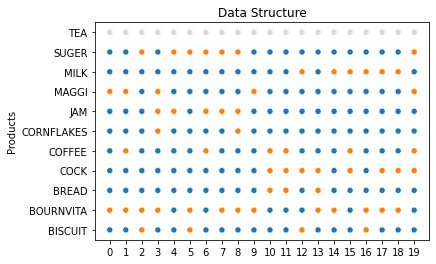

In [ ]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Products')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title("Data Structure")


<a id='step'></a>
<h1 style="color:forestgreen" >4. Paso a paso</h1> 


**Primera Iteration:** Encuentre valores de soporte para cada producto.
- n: 20 (df.shape[0])

In [ ]:
# Encontrar la frecuencia de los elementos
df.sum().sort_values()

JAM            2
COCK           3
BOURNVITA      4
MAGGI          5
MILK           5
CORNFLAKES     6
SUGER          6
BISCUIT        7
TEA            7
COFFEE         8
BREAD         13
dtype: int64

Si dividimos todos los elementos con el número de fila, podemos encontrar el valor de Soporte. Nuestro valor de umbral es 0,2 para el valor de soporte.

In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [ ]:
# Eliminación por valor de soporte
first[first.Support >= 0.15]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


**Segunda Iteration:** Encuentre valores de soporte para combinaciones de productos de pares.

In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Muestra de combinaciones
second[:10]

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM']]

In [ ]:
# Encontrar valores de apoyo
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum() 
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(TEA, MAGGI)",0.20,2
"(BREAD, TEA)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, MILK)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(COFFEE, CORNFLAKES)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(BREAD, MAGGI)",0.15,2


<a id='myfunction'></a>
<h1 style="color:forestgreen" >5. Mi función</h1> 

El paquete mlxtend nos ayuda a analizar los problemas de las reglas de asociación. En este contenido, intenté crear mi propia función para las reglas de asociación.

In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):
    
    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex): 
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum() 
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result    
    
    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1
    
    if num_iter == 1:
        res = first.copy()
        
    # Second Iteration
    elif num_iter == 2:
        
        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)
        
    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)
    
    return res

In [ ]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
BREAD,0.65,1
COFFEE,0.40,1
BISCUIT,0.35,1
TEA,0.35,1
CORNFLAKES,0.30,1
SUGER,0.30,1
MAGGI,0.25,1
MILK,0.25,1
BOURNVITA,0.20,1
COCK,0.15,1


In [ ]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(COFFEE, CORNFLAKES)",0.20,2
"(BREAD, TEA)",0.20,2
"(TEA, MAGGI)",0.20,2
"(BREAD, SUGER)",0.20,2
"(BREAD, BISCUIT)",0.20,2
"(BREAD, MILK)",0.20,2
"(COFFEE, SUGER)",0.20,2
"(BREAD, COFFEE)",0.15,2
"(COFFEE, COCK)",0.15,2


In [ ]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(BISCUIT, COCK, CORNFLAKES)",0.10,3
"(TEA, BOURNVITA, BREAD)",0.10,3
"(TEA, MAGGI, BREAD)",0.10,3
"(SUGER, COFFEE, BREAD)",0.10,3
"(BISCUIT, CORNFLAKES, COFFEE)",0.10,3
"(BISCUIT, BREAD, MILK)",0.10,3
"(COCK, CORNFLAKES, COFFEE)",0.10,3
"(BISCUIT, COCK, COFFEE)",0.10,3
"(BISCUIT, TEA, MAGGI)",0.10,3


In [ ]:
iteration4 = ar_iterations(df, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(BISCUIT, COCK, CORNFLAKES, COFFEE)",0.10,4
"(CORNFLAKES, TEA, COFFEE, MILK)",0.05,4
"(BISCUIT, CORNFLAKES, BREAD, MILK)",0.05,4
"(BISCUIT, TEA, MAGGI, BREAD)",0.05,4


<a id='ar'></a>
<h1 style="color:forestgreen" >6. Regla de Asociación</h1> 

Aquí hay dos funciones principales.
- La función `apriori ()` evalúa el valor de soporte para cada producto.
- La función `association_rules ()` nos ayuda a comprender la relación entre antecedentes y productos de consecuencias. Proporciona información notable sobre los productos.

Especialmente, las variables de "soporte antecedente", "soporte consecuente", "soporte", "confianza" y "elevación" son muy importantes para tomar algunas decisiones comerciales.

In [ ]:
# Apriori
freq_items = apriori(df,  min_support = 0.2, use_colnames = True)
freq_items.sort_values("support", ascending = False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)
7,0.30,(SUGER)
5,0.25,(MAGGI)
6,0.25,(MILK)
1,0.20,(BOURNVITA)
9,0.20,"(BISCUIT, BREAD)"


### El valor de soporte nos brinda esta información:

**Head 5**
- 65 por ciento de 100 compras son "PAN"
- El 40 por ciento de las 100 compras son "CAFÉ"
- El 35 por ciento de las 100 compras son "BISCUIT"
- El 35 por ciento de las 100 compras son "TEA"
- El 30 por ciento de las 100 compras son "CORNFLAKES"

**Tail 5**
- El 10 por ciento de 100 compras son "MAGGI" y "BISCUIT"
- El 10 por ciento de las 100 compras son "LECHE" y "GALLETAS"
- El 10 por ciento de las 100 compras son "TÉ" y "BISCUIT"
- El 10 por ciento de las 100 compras son "JAM" y "BISCUIT"
- El 10 por ciento de las 100 compras son "COCK", "CAFÉ", "GALLETAS" y "CORNFLAKES"

In [ ]:
freq_items.sort_values("support", ascending = False).head(5)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
8,0.35,(TEA)
4,0.30,(CORNFLAKES)


In [ ]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
11,0.20,"(BREAD, SUGER)"
12,0.20,"(TEA, BREAD)"
13,0.20,"(COFFEE, CORNFLAKES)"
14,0.20,"(COFFEE, SUGER)"
15,0.20,"(TEA, MAGGI)"


In [ ]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.2)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
1,(BREAD),(BISCUIT),0.65,0.35,0.20,0.31,0.88,-0.03,0.94
2,(BREAD),(MILK),0.65,0.25,0.20,0.31,1.23,0.04,1.08
3,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
4,(BREAD),(SUGER),0.65,0.30,0.20,0.31,1.03,0.01,1.01
5,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
6,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
7,(BREAD),(TEA),0.65,0.35,0.20,0.31,0.88,-0.03,0.94
8,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.50,1.67,0.08,1.40
9,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80


- La variable de soporte antecedente nos dice la probabilidad de productos antecedentes solamente
- La variable de soporte de consecuentes nos dice la probabilidad de productos consecuentes solamente
- El valor de soporte es el valor de los dos productos (antecedentes y consecuencias)
- La confianza es una indicación de la frecuencia con la que se ha determinado que la regla es cierta.
- La relación entre el apoyo observado y el esperado si X e Y fueran independientes.

In [ ]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(MILK),(BREAD),0.25,0.65,0.20,0.80,1.23,0.04,1.75
9,(MAGGI),(TEA),0.25,0.35,0.20,0.80,2.29,0.11,3.25
2,(SUGER),(BREAD),0.30,0.65,0.20,0.67,1.03,0.01,1.05
5,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
7,(SUGER),(COFFEE),0.30,0.40,0.20,0.67,1.67,0.08,1.80
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
3,(TEA),(BREAD),0.35,0.65,0.20,0.57,0.88,-0.03,0.82
8,(TEA),(MAGGI),0.35,0.25,0.20,0.57,2.29,0.11,1.75
